In [5]:
import os

import numpy as np
import seaborn as sns

from tqdm.auto import tqdm
from sklearn.preprocessing import normalize

In [2]:
BASE_DIR = "/Users/artemvopilov/Programming/yandex_cup_2023"

In [35]:
EMBEDDINGS_DIR = f"{BASE_DIR}/embeddings"
NORMED_EMBEDDINGS_DIR = f"{BASE_DIR}/normed_embeddings"

### Read

In [4]:
track_id_to_embeddings = {}
for fn in tqdm(os.listdir(EMBEDDINGS_DIR)):
    fp = f"{EMBEDDINGS_DIR}/{fn}"

    track_id = fn.split('.')[0]
    embeddings = np.load(fp)
    track_id_to_embeddings[track_id] = embeddings

  0%|          | 0/76714 [00:00<?, ?it/s]

### Normalize

In [6]:
def print_norms(track_id_to_embeddings):
    norms = [np.mean([np.linalg.norm(e) for e in embeds]) for embeds in tqdm(track_id_to_embeddings.values())]
    sns.displot(norms, kind="kde")

  0%|          | 0/76714 [00:00<?, ?it/s]

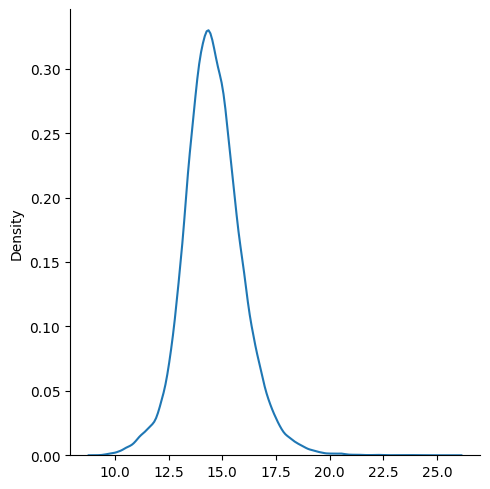

In [7]:
print_norms(track_id_to_embeddings)

In [32]:
track_id_to_normed_embeddings = {ti: normalize(embeds) for ti, embeds in tqdm(track_id_to_embeddings.items())}

  0%|          | 0/76714 [00:00<?, ?it/s]

  0%|          | 0/76714 [00:00<?, ?it/s]

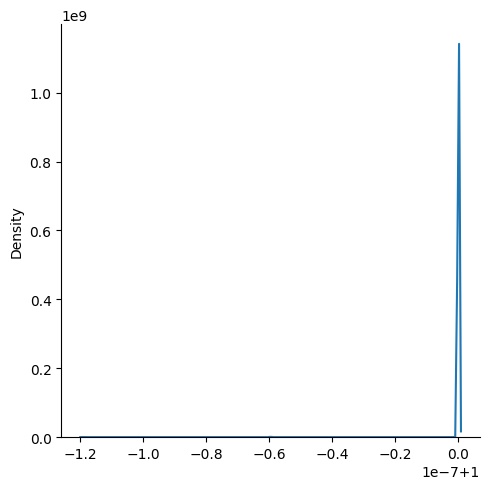

In [33]:
print_norms(track_id_to_normed_embeddings)

### Save

In [42]:
os.mkdir(NORMED_EMBEDDINGS_DIR)

In [43]:
for ti, embeddings in tqdm(track_id_to_normed_embeddings.items()):
    fn = f"{ti}.npy"
    fp = f"{NORMED_EMBEDDINGS_DIR}/{fn}"
    np.save(fp, embeddings)

  0%|          | 0/76714 [00:00<?, ?it/s]